Data Visualization based on HRDataset.csv

Questions asked:
1. Is there any relation between worker supervisor (ManagerName/ManagerID) and work efficiency assessment(PerformanceScore)?
2. Which employee sources of acquisition(Recruitment Source) are the best when the most important thing is the longest employee experience?
3. Is there any correlation between employee marital status(MartialDesc) and employee satisfaction(EmpSatisfaction)?
4. How looks current employee age distribution?
5. Do older employees work on more special projects than younger employees? 

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


1. Is there any relation between worker supervisor (ManagerName/ManagerID) and work efficiency assessment(PerformanceScore)?

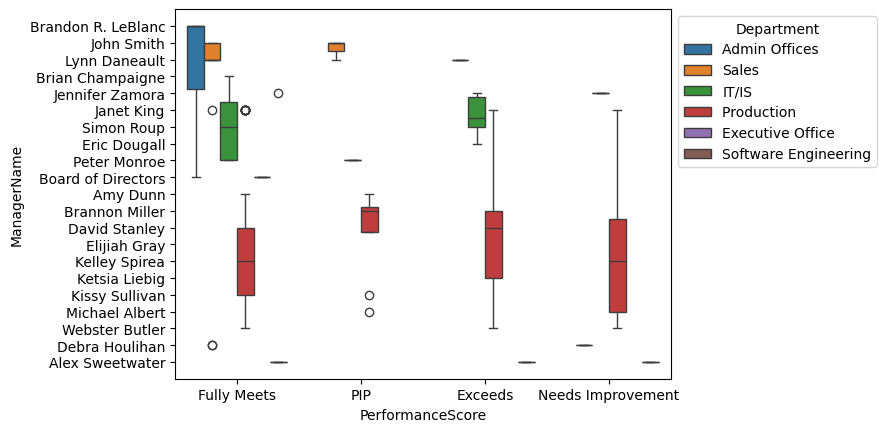

In [5]:
box = sns.boxplot(x='PerformanceScore',y='ManagerName',data=df,hue='Department')
sns.move_legend(box,"upper left", bbox_to_anchor=(1, 1))

In [6]:
manager_performance_counts = df.groupby('ManagerName')['PerformanceScore'].value_counts().unstack(fill_value=0)

print(manager_performance_counts)

PerformanceScore    Exceeds  Fully Meets  Needs Improvement  PIP
ManagerName                                                     
Alex Sweetwater           2            6                  1    0
Amy Dunn                  3           15                  1    2
Board of Directors        0            2                  0    0
Brandon R. LeBlanc        0            7                  0    0
Brannon Miller            7            9                  1    4
Brian Champaigne          0            8                  0    0
David Stanley             1           19                  1    0
Debra Houlihan            0            2                  1    0
Elijiah Gray              2           18                  2    0
Eric Dougall              1            3                  0    0
Janet King                4           13                  2    0
Jennifer Zamora           2            4                  1    0
John Smith                0           12                  0    2
Kelley Spirea            

In [8]:
manager_performance_percentage = manager_performance_counts.div(manager_performance_counts.sum(axis=1), axis=0) * 100

print(manager_performance_percentage)

PerformanceScore      Exceeds  Fully Meets  Needs Improvement        PIP
ManagerName                                                             
Alex Sweetwater     22.222222    66.666667          11.111111   0.000000
Amy Dunn            14.285714    71.428571           4.761905   9.523810
Board of Directors   0.000000   100.000000           0.000000   0.000000
Brandon R. LeBlanc   0.000000   100.000000           0.000000   0.000000
Brannon Miller      33.333333    42.857143           4.761905  19.047619
Brian Champaigne     0.000000   100.000000           0.000000   0.000000
David Stanley        4.761905    90.476190           4.761905   0.000000
Debra Houlihan       0.000000    66.666667          33.333333   0.000000
Elijiah Gray         9.090909    81.818182           9.090909   0.000000
Eric Dougall        25.000000    75.000000           0.000000   0.000000
Janet King          21.052632    68.421053          10.526316   0.000000
Jennifer Zamora     28.571429    57.142857         

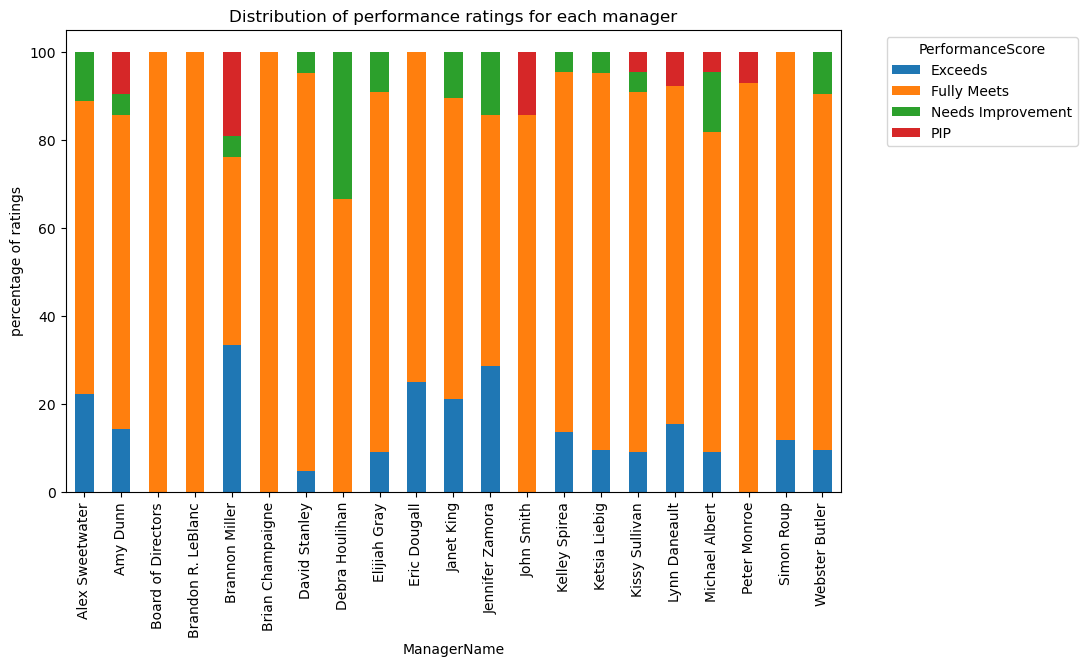

In [9]:
manager_performance_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of performance ratings for each manager")
plt.xlabel("ManagerName")
plt.ylabel("percentage of ratings")
plt.legend(title="PerformanceScore", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
manager_department = df.groupby('ManagerName')['Department'].value_counts().unstack(fill_value=0)

print(manager_department)


Department          Admin Offices  Executive Office  IT/IS  Production         \
ManagerName                                                                     
Alex Sweetwater                 0                 0      0                  0   
Amy Dunn                        0                 0      0                 21   
Board of Directors              1                 1      0                  0   
Brandon R. LeBlanc              7                 0      0                  0   
Brannon Miller                  0                 0      0                 21   
Brian Champaigne                0                 0      8                  0   
David Stanley                   0                 0      0                 21   
Debra Houlihan                  0                 0      0                  0   
Elijiah Gray                    0                 0      0                 22   
Eric Dougall                    0                 0      4                  0   
Janet King                  

<Axes: xlabel='Department', ylabel='PayRate'>

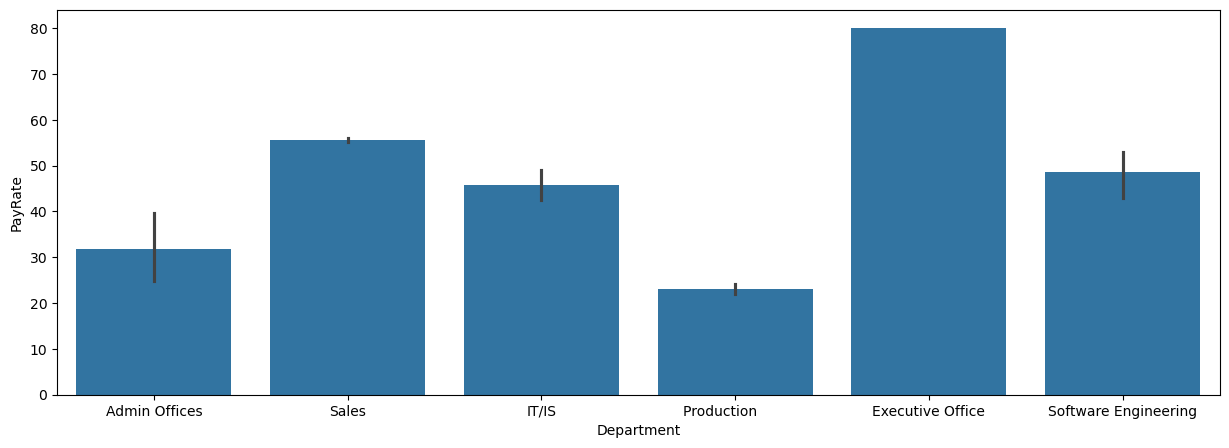

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x='Department',y='PayRate',data=df)

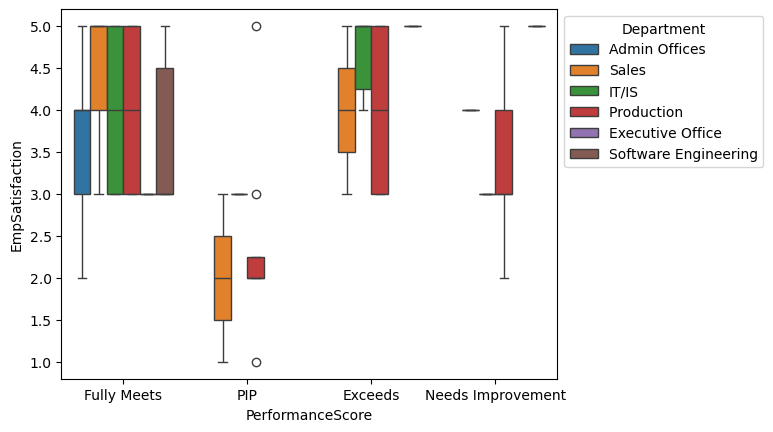

In [12]:
box2 = sns.boxplot(x='PerformanceScore',y='EmpSatisfaction',data=df,hue='Department')
sns.move_legend(box2,"upper left", bbox_to_anchor=(1, 1))

In my opinion distribution of performance ratings for each manager is quite uniform. Most of them evaluate their worker as "fully meets". The percentage of "PIP" is much lower than for "Exceeds", this is very positive when we talk about worker performance rating. To sum up every manager evaluate his worker very well. Any deviation i can see is in the case of 2 employees in Admin Offices and Executive Office departments where is only one person and this is CEO. I think dependence between manager and employee is insignificant, because employees scores are pretty high no matter what. Even if one employee had a different supervisor every day, there is a greater probability that he will receive a good assessment than "PIP" or "needs improvement". I think it is more accurate to look for a dependence between performance score and employee satisfaction. When we look on graphs where we have "fully meets" or "exceeds" the employee satisfaction is higher but some of employees who have worse performance score have almost same employee satisfaction as employees with "fully meets" score. In Sales, IT and Production departments we have the most discrepancies. Maybe my analysis is not enough deep and based on these graphs it is hard to evaluate is there any clear relation between worker supervisor (ManagerName/ManagerID) and work efficiency assessment(PerformanceScore).

2. Which employee sources of acquisition(Recruitment Source) are the best when most important thing is the longest employee experience?

In [13]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [14]:
import datetime as dt
import numpy as np

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(365,'D')

df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.923288
1,2014-01-06,NaT,5.726027
2,2014-09-29,NaT,4.997260
3,2015-02-16,2015-04-15,0.158904
4,2015-05-01,NaT,4.410959


<Axes: xlabel='Seniority', ylabel='RecruitmentSource'>

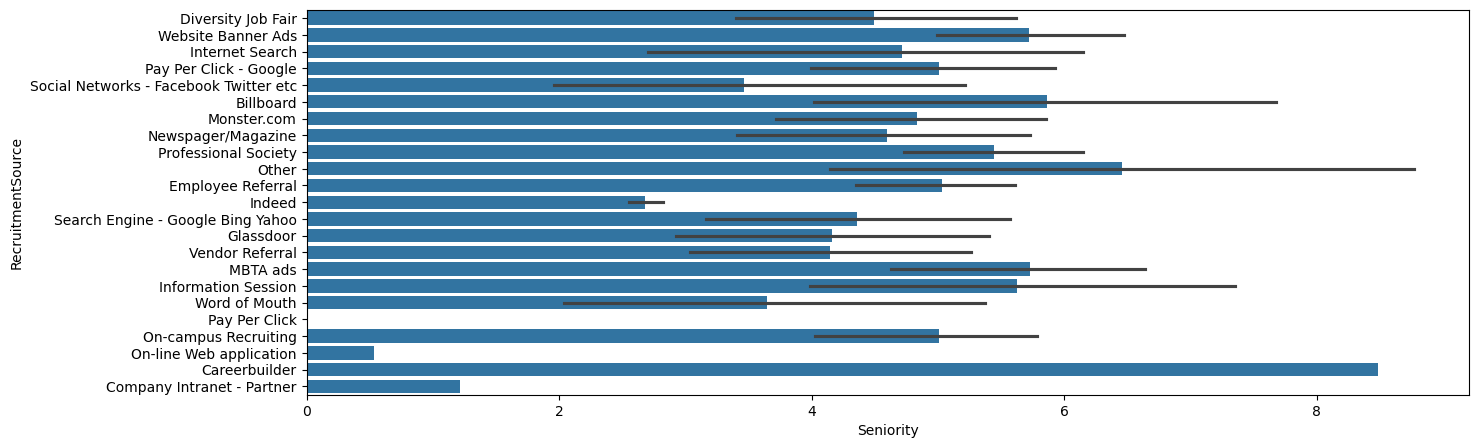

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x='Seniority',y='RecruitmentSource',data=df)

If we care about the longest employee experience the best employee sources of acquisition(Recruitment Source) are: 
1. Careerbuilder,
2. Other and billboard.
   
Other stand out:
1. Website Banner ads,
2. MBTA ads,
3. Information session.

3. Is there any correlation between employee marital status(MartialDesc) and employee satisfaction(EmpSatisfaction)?

<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

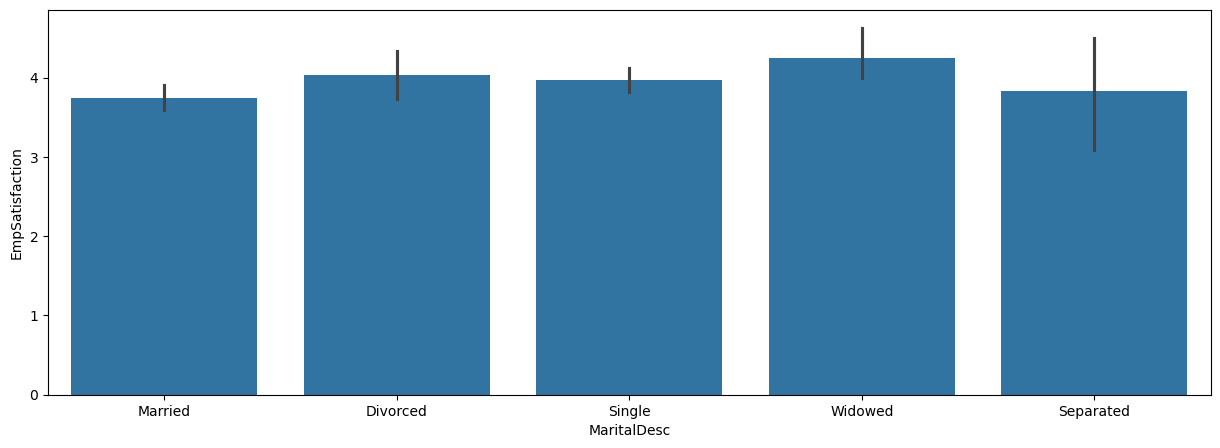

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

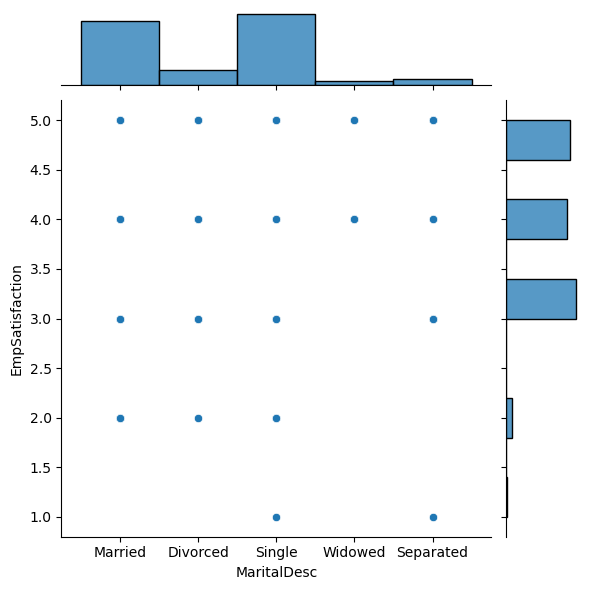

In [17]:
sns.jointplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

In [18]:
df['MaritalDesc'].value_counts()

MaritalDesc
Single       137
Married      123
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

The most numerous groups we have are single and married. The least numerous is widowed. Employee satisfaction level is leveled because we have the most ratings between 3 and 5 in every group apart from widowed because this group seems to be the most satisfied. I think in single and married groups the ratings are the most diverse but low ratings we have only few. In my opinion there is no big relation between marital status and satisfaction. 

4. How looks current employee age distribution?

In [19]:
df[['Termd','DOB','DateofTermination']].head()

,Termd,DOB,DateofTermination
0,0.0,11/24/87,NaT
1,0.0,04/26/84,NaT
2,0.0,09/01/86,NaT
3,1.0,09/16/85,2015-04-15
4,0.0,05/19/88,NaT


where termd=0, the employee still works, because DateofTermination has a date entered only when termd=1

In [30]:
working_employees = df[df['Termd'] == 0]
working_employees

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.923288
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.726027
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.997260
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.410959
7,"Carter, Michelle",1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,...,John Smith,17.0,Billboard,Fully Meets,5.00,5.0,0.0,1/21/2019,0.0,5.112329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0,4.882192
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0,4.882192
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,1/14/2019,0.0,3.243836
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0,4.882192


In [34]:
working_employees['DOB'] = pd.to_datetime(working_employees['DOB'], errors='coerce')
current_date = datetime.now()
working_employees['Age'] = working_employees['DOB'].apply(
    lambda dob: (current_date - dob).days // 365 if pd.notnull(dob) and dob <= current_date else None
)
print(working_employees[['DOB', 'Age']])

           DOB   Age
0   1987-11-24  37.0
1   1984-04-26  40.0
2   1986-09-01  38.0
4   1988-05-19  36.0
7   2063-05-15   NaN
..         ...   ...
305 2052-01-18   NaN
306 1986-04-23  38.0
307 1983-02-09  42.0
308 2065-09-09   NaN
309 1978-05-02  46.0

[207 rows x 2 columns]


In [35]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.923288
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.726027
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.997260
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN,0.158904
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.410959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Age', ylabel='EmpID'>

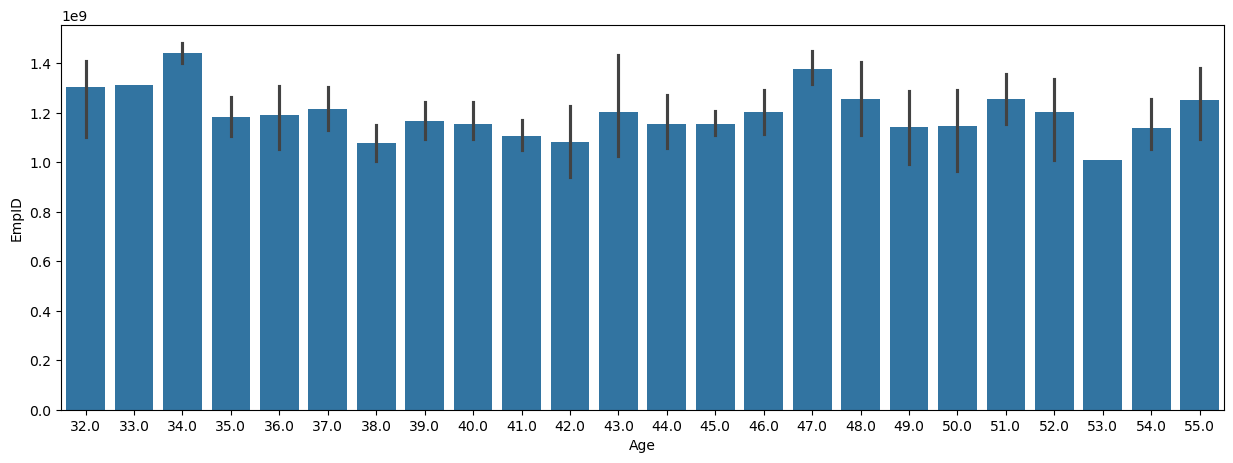

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age',y='EmpID',data=working_employees)

The company currently employs employees aged 32 to 55.

In [38]:
working_employees['Age'].mean()

42.668508287292816

Mean age of current workers is 42.

5. Do older employees work on more special projects than younger employees? 

In [39]:
working_employees['Age'].min()

32.0

In [40]:
working_employees['Age'].max()

55.0

I don't know how to evaluate "younger employees" so i will assume that employees under 42 are younger and all above 42 are older employees.

In [41]:
working_employees['Age'].dtype

dtype('float64')

In [42]:
working_employees['SpecialProjectsCount'].dtype

dtype('float64')

In [43]:
less_than_42 = working_employees[working_employees['Age'] <= 42]
less_than_42

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.923288,37.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.726027,40.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.997260,38.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.410959,36.0
8,"Dietrich, Jenna",1.408069e+09,0.0,0.0,0.0,1.0,6.0,1.0,0.0,55.00,...,17.0,Website Banner Ads,PIP,2.30,1.0,0.0,1/29/2019,0.0,7.605479,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,"Szabo, Andrew",1.201031e+09,0.0,0.0,1.0,1.0,4.0,4.0,0.0,48.00,...,10.0,MBTA ads,Exceeds,2.61,5.0,5.0,2/18/2019,0.0,5.227397,41.0
300,"Boutwell, Bonalyn",1.307060e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,34.95,...,3.0,Diversity Job Fair,Fully Meets,5.00,4.0,3.0,2/18/2019,0.0,4.613699,37.0
302,"Carr, Claudia N",1.010022e+09,0.0,0.0,0.0,2.0,3.0,3.0,0.0,61.30,...,4.0,Vendor Referral,Fully Meets,5.00,5.0,6.0,2/18/2019,0.0,3.243836,38.0
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0,4.882192,38.0


<Axes: xlabel='Age', ylabel='SpecialProjectsCount'>

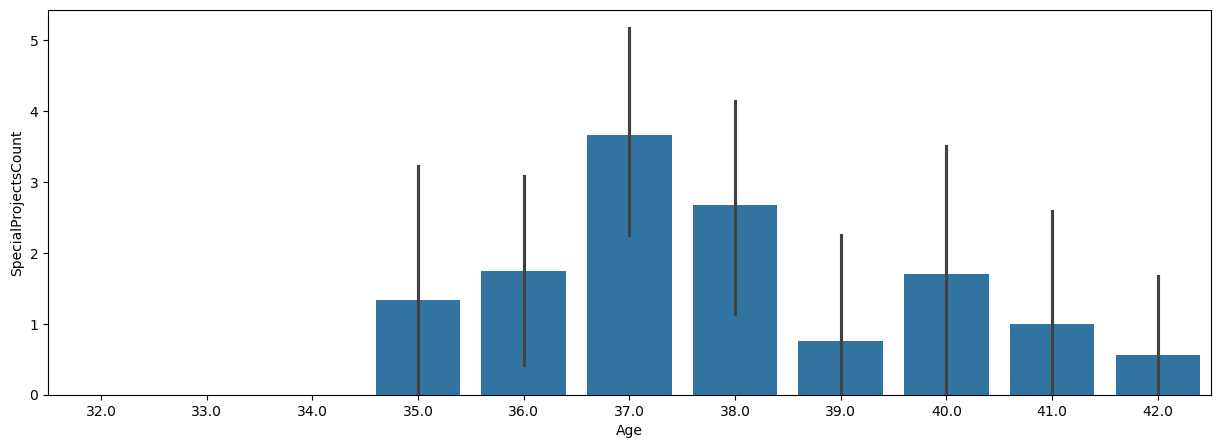

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age',y='SpecialProjectsCount',data=less_than_42)

The most special projects have employees in age between 36 and 38, but this is not more than 4-5 projects. Employees under 35 years don't have any of special projects.

In [45]:
more_than_42 = working_employees[working_employees['Age'] > 42]
more_than_42

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority,Age
10,"Friedman, Gerry",1.204033e+09,0.0,0.0,1.0,1.0,6.0,3.0,1.0,55.50,...,17.0,Diversity Job Fair,Fully Meets,3.65,5.0,0.0,1/17/2019,0.0,8.564384,55.0
15,"Mullaney, Howard",1.306058e+09,0.0,0.0,1.0,1.0,6.0,1.0,0.0,55.00,...,17.0,Internet Search,PIP,1.93,3.0,0.0,1/30/2019,0.0,4.997260,49.0
20,"Buck, Edward",1.504073e+09,1.0,1.0,1.0,1.0,6.0,3.0,0.0,55.00,...,21.0,Employee Referral,Fully Meets,3.31,5.0,0.0,1/28/2019,0.0,4.997260,49.0
24,Jeremy Prater,1.001085e+09,1.0,1.0,1.0,1.0,6.0,1.0,0.0,56.00,...,21.0,Website Banner Ads,PIP,1.81,2.0,0.0,1/17/2019,0.0,5.380822,50.0
25,"Khemmich, Bartholemew",1.104025e+09,0.0,0.0,1.0,1.0,6.0,3.0,0.0,55.00,...,21.0,Pay Per Click - Google,Fully Meets,2.19,5.0,0.0,1/22/2019,0.0,6.109589,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,"Wang, Charlie",1.009920e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,51.00,...,13.0,Indeed,Fully Meets,3.42,4.0,7.0,1/4/2019,0.0,2.613699,43.0
289,"Andreola, Colby",1.107027e+09,0.0,0.0,0.0,1.0,4.0,3.0,0.0,47.60,...,10.0,Vendor Referral,Fully Meets,3.04,3.0,4.0,1/2/2019,0.0,4.882192,45.0
291,"Del Bosque, Keyla",1.203032e+09,0.0,0.0,0.0,1.0,4.0,3.0,0.0,57.12,...,10.0,Monster.com,Fully Meets,3.79,5.0,5.0,1/25/2019,0.0,7.720548,45.0
299,"Foster-Baker, Amy",1.201031e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,34.95,...,9.0,Other,Fully Meets,5.00,3.0,2.0,2/8/2019,0.0,10.731507,45.0


<Axes: xlabel='Age', ylabel='SpecialProjectsCount'>

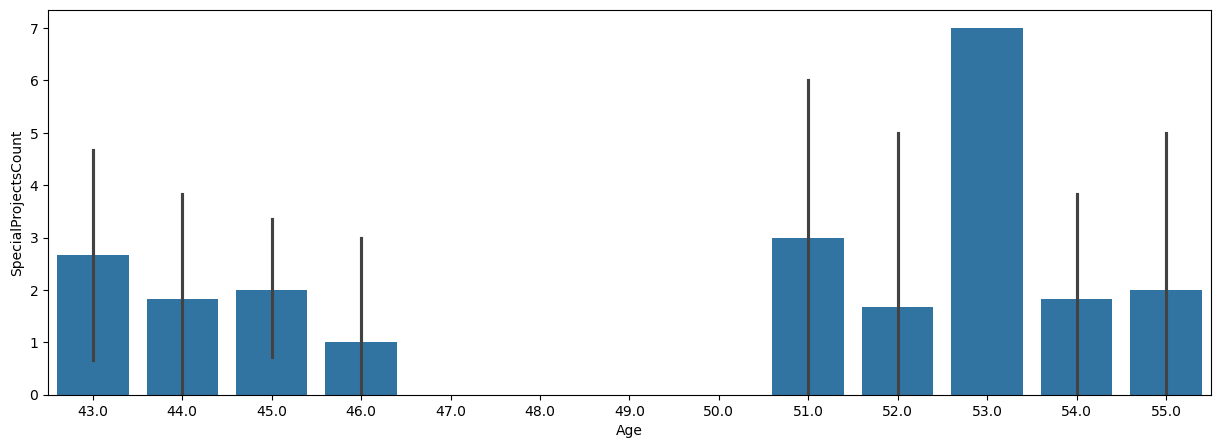

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age',y='SpecialProjectsCount',data=more_than_42)

Employees between 43 and 46 have less special project than employees between 36 and 38. Then we have empty field which is assigned to employees between 47 and 50. They have no special projects. Then employees between 51-52 have same amount of projects as people in age 43-46. The maximum whe have in age 53 - almost 7 special projects. Employees between 54-55 are also same active as people in age 43-46.

In [47]:
below_42_projects = working_employees[working_employees['Age'] < 42]['SpecialProjectsCount'].sum()
above_42_projects = working_employees[working_employees['Age'] >= 42]['SpecialProjectsCount'].sum()

print(f"Number of projects for people under 42: {below_42_projects}")
print(f"Number of projects for people aged 42 and over: {above_42_projects}")

Number of projects for people under 42: 152.0
Number of projects for people aged 42 and over: 125.0


Answering on question, younger employees(those under 42) have more special projects than older employees.